In [7]:
# Import necessary libraries
import pandas as pd  # For data manipulation//table
import numpy as np  # For math and numerical operations
import seaborn as sns  # For visualizations//chart
import matplotlib.pyplot as plt  # For plotting
#data preparation tools
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler#words to num,number betwen 0-1,center around zero
from sklearn.decomposition import PCA#keep important info
from sklearn.feature_selection import VarianceThreshold#remove column but not mutch
from sklearn.model_selection import train_test_split

In [6]:
url ="https://raw.githubusercontent.com/kaveeshaadithya03/AIML/refs/heads/main/Online_Dating_Behavior_Dataset.csv"
data = pd.read_csv(url, encoding='latin-1')
df = pd.DataFrame(data)
data.head()

,Gender,PurchasedVIP,Income,Children,Age,Attractiveness,Matches
0,0,1,51777,3,47,5,70
1,1,0,36646,0,42,7,130
2,0,0,53801,1,25,5,0
3,0,0,56105,0,35,8,0
4,0,0,55597,1,36,6,0


     Gender  PurchasedVIP  Income  Children  Age  Attractiveness  Matches  \
0         0             1   51777         3   47               5       70   
1         1             0   36646         0   42               7      130   
2         0             0   53801         1   25               5        0   
3         0             0   56105         0   35               8        0   
4         0             0   55597         1   36               6        0   
..      ...           ...     ...       ...  ...             ...      ...   
995       0             0   36799         0   28               1        0   
996       0             1   43882         2   46               9       70   
997       1             0   49629         2   49               6      120   
998       1             0   45706         1   22               8      140   
999       0             0   43075         0   43               3        0   

     Age_minmax  Age_standard  
0      0.935484      1.354446  
1      0.77

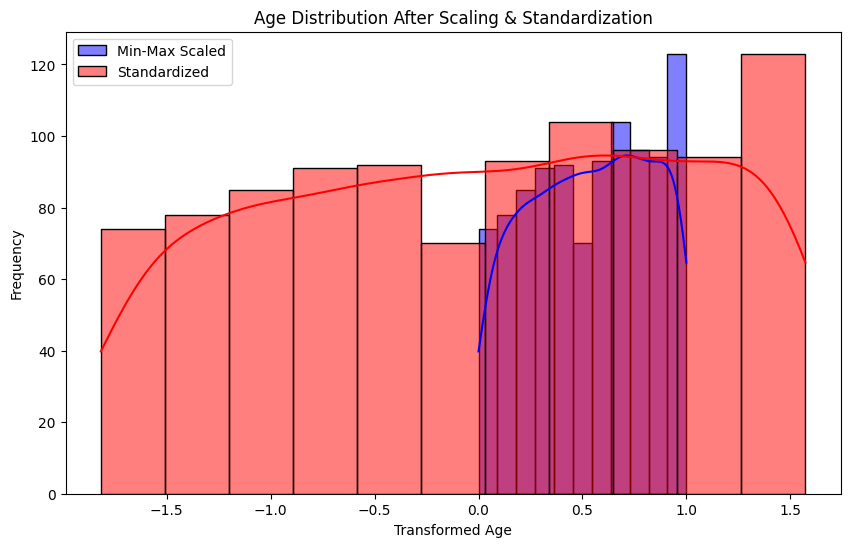

In [9]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

# Min-Max Scaling
scaler = MinMaxScaler()
df_no_outliers['Age_minmax'] = scaler.fit_transform(df_no_outliers[['Age']])

# Standardization (Z-score)
std_scaler = StandardScaler()
df_no_outliers['Age_standard'] = std_scaler.fit_transform(df_no_outliers[['Age']])
print(df_no_outliers)

# EDA Visualization: Histogram comparison
plt.figure(figsize=(10,6))
sns.histplot(df_no_outliers['Age_minmax'], kde=True, color="blue", label="Min-Max Scaled")
sns.histplot(df_no_outliers['Age_standard'], kde=True, color="red", label="Standardized")
plt.legend()
plt.title("Age Distribution After Scaling & Standardization")
plt.xlabel("Transformed Age")
plt.ylabel("Frequency")
plt.show()